## Predict digits 

Train a MLP on the MNIST dataset to predict 0-9 digits

In [9]:
# Change the reference dir to the root folder
import os
os.chdir('../')

In [8]:
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import plot_numbers

In [5]:
import os
os.chdir('../')

In [ ]:
(X_train_full, y_train_full), (X_test_full, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.min(), X_train_full.max()

(0, 255)

The train set contains 60,000 images in 28x28 array. Each element of the array represents the pixel intensity of the image, ranging from 1 to 255

Let's see some of the pictures of the dataset

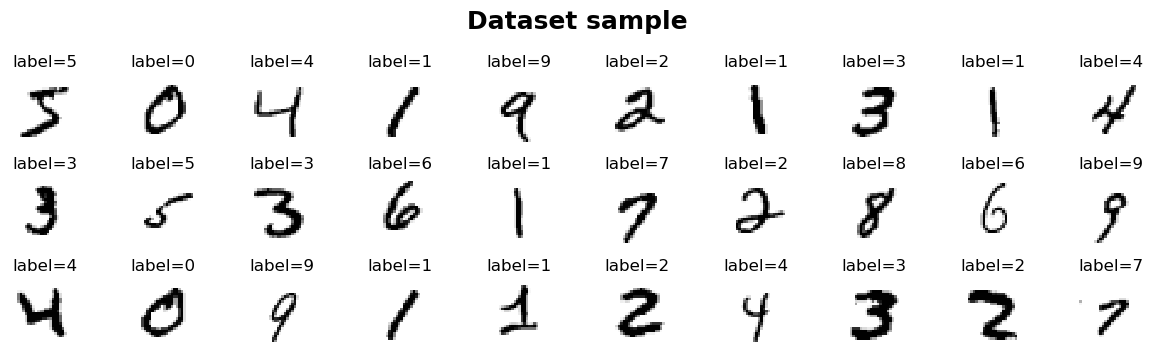

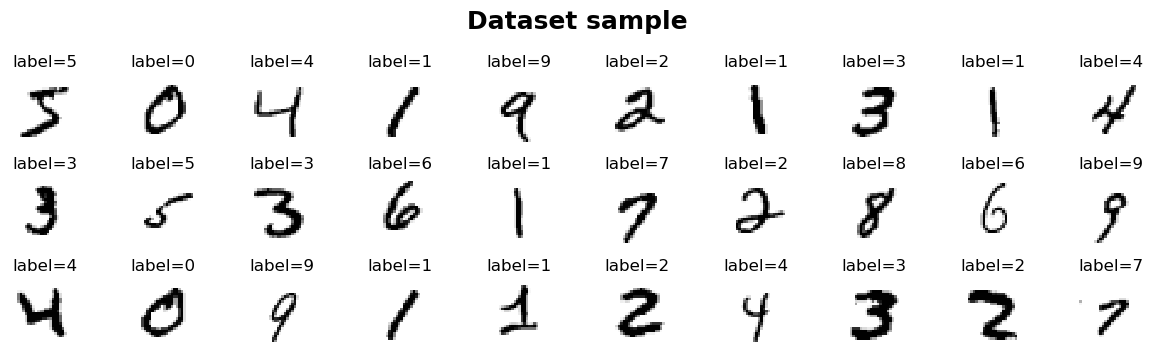

In [5]:
plot_numbers(X_train_full, true_label=y_train_full, title='Dataset sample')

Normalizing array and creating validation set (the data is already shuffled)

In [6]:
# Creating validation set
X_train, X_valid = X_train_full[:5000], X_train_full[5000:]
y_train, y_valid = y_train_full[:5000], y_train_full[5000:]

In [7]:
# Normalizing values from 0-255 to 0-1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test_full / 255.

## Building a model to predict the digits

In [3]:
retrain = False

In [4]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
]
)

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [8]:
if retrain:
    history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=20)
else:
    model = tf.keras.models.load_model('models/mnist_keras_model')

In [9]:
if retrain:
    model.save("./models/mnist_keras_model", save_format="tf")

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 2s 5ms/step


In [16]:
print('Metrics:')
print(classification_report(y_test, y_pred))

Metrics:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.95      0.92      0.93       892
           6       0.94      0.95      0.95       958
           7       0.94      0.95      0.94      1028
           8       0.93      0.93      0.93       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



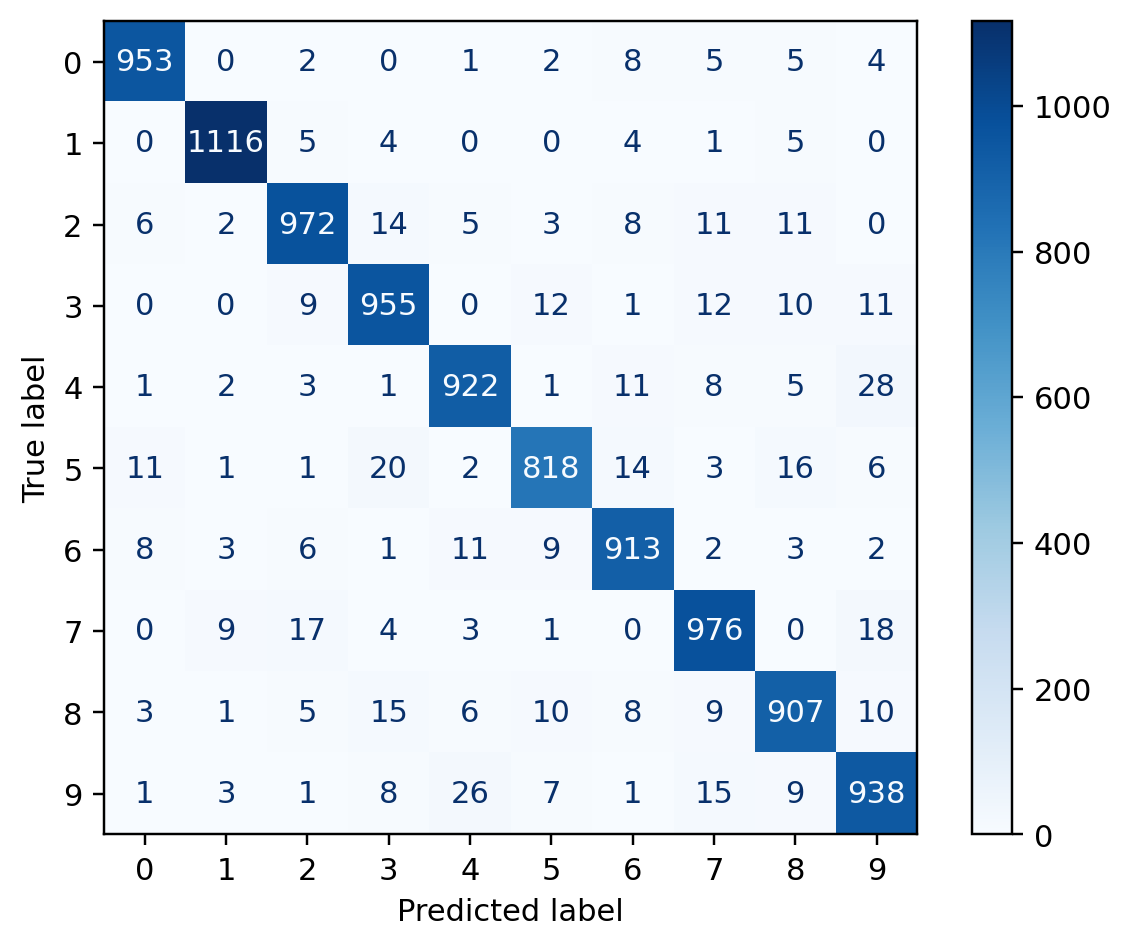

In [17]:
fig, ax = plt.subplots(dpi=220)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)
plt.show()

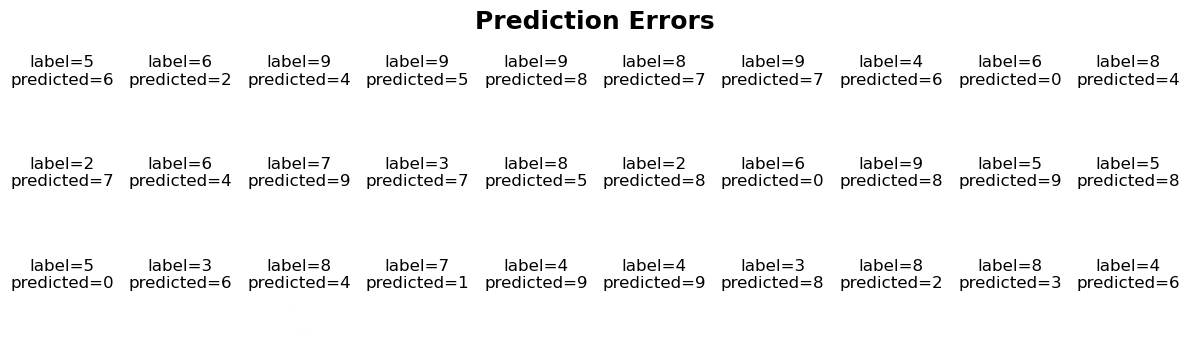

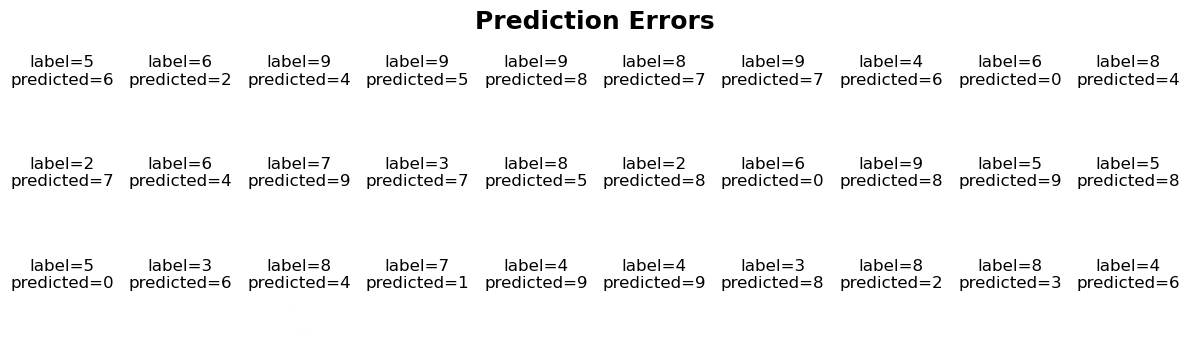

In [18]:
plot_numbers(
    img_array=X_test[y_pred != y_test],
    true_label=y_test[y_pred != y_test],
    predicted_label=y_pred[y_pred != y_test],
    title='Prediction Errors'
)

## Creating OCR

In [19]:
import cv2

In [23]:
# Read the input image
image = cv2.imread("img/img_run_2023_04_02_11_57_58.png")

In [24]:
image.shape

(150, 600, 3)

In [25]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [26]:
gray.shape

(150, 600)

In [27]:
# Apply thresholding to convert the grayscale image to a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [28]:
# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
# Filter the contours based on size and aspect ratio
digits = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if w >= 10 and h >= 20 and w/h >= 0.5:
        digit = thresh[y:y+h, x:x+w]
        digit = cv2.resize(digit, (28, 28))
        digits.append(digit)
        
digits = np.array(digits)

In [30]:
digits.shape

(7, 28, 28)

In [31]:
model.predict(digits)

1/1 [==============================] - 0s 229ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.00

In [32]:
y_pred_custom_img = np.argmax(model.predict(digits), axis=1)

1/1 [==============================] - 0s 45ms/step


## Fine tune model

**IN WORKS**

In [73]:
# IN WORKS
canvas_digits = pd.read_csv('img/canvas_digits2.csv')

In [74]:
canvas_digits = canvas_digits.query('label >= 0')

In [76]:
canvas_digits.shape

(186, 785)

In [75]:
new_digits = canvas_digits.iloc[:, :-1].to_numpy().reshape(-1, 28, 28)
new_labels = canvas_digits.iloc[:, -1].to_numpy()

In [77]:
history2 = model.fit(new_digits, new_labels, batch_size=32, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
6/6 [==============================] - 6s 1s/step - loss: 892.0980 - accuracy: 0.4247 - val_loss: 0.5348 - val_accuracy: 0.8585
Epoch 2/10
6/6 [==============================] - 8s 2s/step - loss: 349.1028 - accuracy: 0.6075 - val_loss: 0.5675 - val_accuracy: 0.8425
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 161.3656 - accuracy: 0.7151 - val_loss: 0.6882 - val_accuracy: 0.7984
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 78.8911 - accuracy: 0.8118 - val_loss: 0.8226 - val_accuracy: 0.7464
Epoch 5/10
6/6 [==============================] - 8s 2s/step - loss: 35.8562 - accuracy: 0.8602 - val_loss: 0.7957 - val_accuracy: 0.7498
Epoch 6/10
6/6 [==============================] - 8s 2s/step - loss: 16.5399 - accuracy: 0.9301 - val_loss: 0.7660 - val_accuracy: 0.7572
Epoch 7/10
6/6 [==============================] - 8s 2s/step - loss: 10.1016 - accuracy: 0.9731 - val_loss: 0.7650 - val_accuracy: 0.7569
Epoch 8/10
6/6 [===============

In [10]:
model.save("./models/mnist_keras_model.h5")